### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

### Preparing data

In [2]:
df = pd.read_csv('datasets/spam.csv', encoding='ISO-8859-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


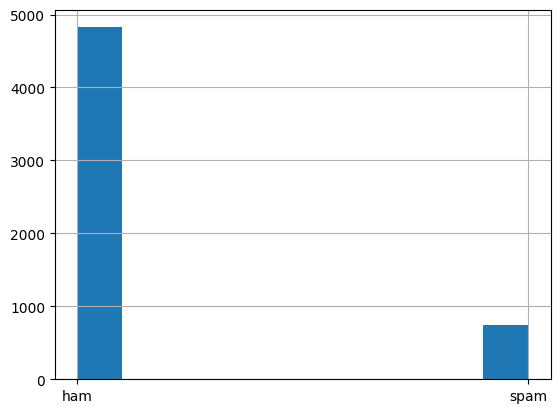

In [4]:
df['v1'].hist();

In [5]:
target_map = {'ham':1, 'spam':0}
df['target'] = df['v1'].map(target_map)

In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,target
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,1
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,0
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,1


In [7]:
X = df['v2']
y = df['target']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [9]:
vectorizer = TfidfVectorizer(max_features=2000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [10]:
X_train

<4457x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 51098 stored elements in Compressed Sparse Row format>

In [11]:
X_train = X_train.toarray()
X_test = X_test.toarray()

### Model training

In [12]:
D = X_train.shape[1]

In [13]:
i = Input(shape=(D,))
x = Dense(1)(i)

model = Model(i, x)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2000)]            0         
                                                                 
 dense (Dense)               (None, 1)                 2001      
                                                                 
Total params: 2001 (7.82 KB)
Trainable params: 2001 (7.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(
    loss = BinaryCrossentropy(from_logits=True),
    optimizer = Adam(learning_rate=0.001),
    metrics = ['accuracy']
)

In [16]:
r = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32
)

Epoch 1/50


140/140 [==============================] - 1s 3ms/step - loss: 0.6329 - accuracy: 0.1351 - val_loss: 0.5761 - val_accuracy: 0.1534
Epoch 2/50
140/140 [==============================] - 0s 2ms/step - loss: 0.5346 - accuracy: 0.4249 - val_loss: 0.4919 - val_accuracy: 0.8027
Epoch 3/50
140/140 [==============================] - 0s 2ms/step - loss: 0.4624 - accuracy: 0.8975 - val_loss: 0.4294 - val_accuracy: 0.9650
Epoch 4/50
140/140 [==============================] - 0s 2ms/step - loss: 0.4087 - accuracy: 0.9533 - val_loss: 0.3821 - val_accuracy: 0.9650
Epoch 5/50
140/140 [==============================] - 0s 2ms/step - loss: 0.3675 - accuracy: 0.9531 - val_loss: 0.3450 - val_accuracy: 0.9623
Epoch 6/50
140/140 [==============================] - 0s 2ms/step - loss: 0.3352 - accuracy: 0.9524 - val_loss: 0.3152 - val_accuracy: 0.9641
Epoch 7/50
140/140 [==============================] - 0s 2ms/step - loss: 0.3090 - accuracy: 0.9520 - val_loss: 0.2907 - val_accuracy: 0.9641
Epoc

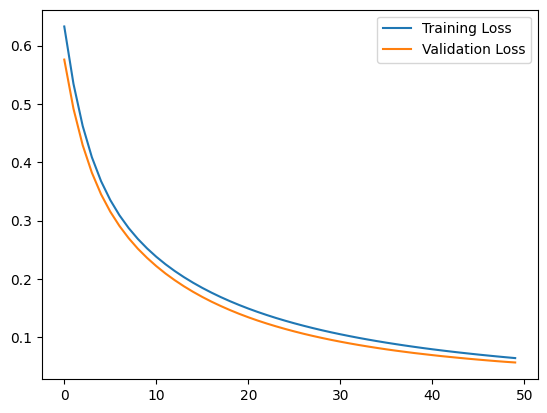

In [17]:
plt.plot(r.history['loss'], label = 'Training Loss')
plt.plot(r.history['val_loss'], label = 'Validation Loss')
plt.legend();

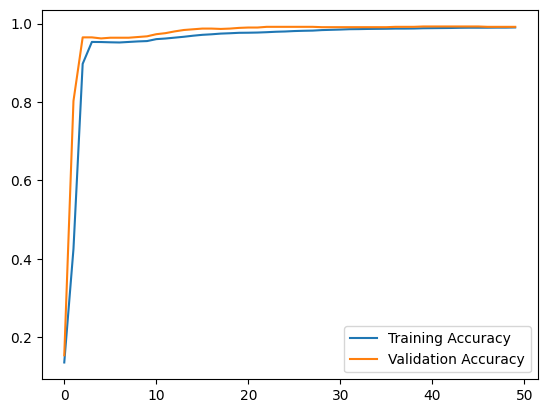

In [18]:
plt.plot(r.history['accuracy'], label = 'Training Accuracy')
plt.plot(r.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend();

In [19]:
p_train = ((model.predict(X_train) > 0) * 1).flatten()
p_test = ((model.predict(X_test) > 0) * 1).flatten()

35/35 [==============================] - 0s 1ms/step


In [20]:
f1_train = f1_score(y_train, p_train)
f1_test = f1_score(y_test, p_test)
print(f"Training f1-score: {f1_train*100:.2f}%")
print(f"Testing f1-score: {f1_test*100:.2f}%")

Training f1-score: 99.25%
Testing f1-score: 99.54%


In [21]:
cm_train = confusion_matrix(y_train, p_train, normalize='true')
cm_test = confusion_matrix(y_test, p_test, normalize='true')

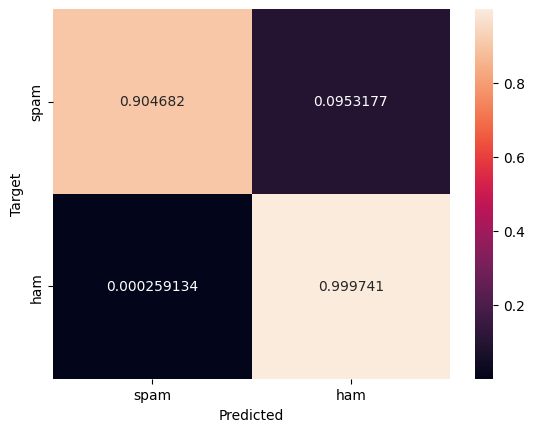

In [22]:
def plot_cm(cm):
  classes = ['spam', 'ham']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sns.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm_train)

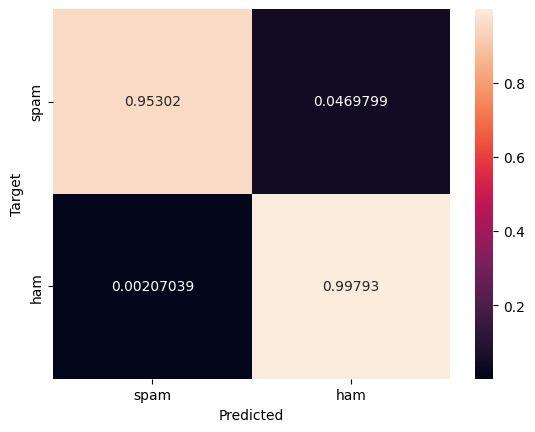

In [23]:
plot_cm(cm_test)

### Checking most influencial words

In [24]:
model.layers

In [25]:
model.layers[1].get_weights()

[array([[-1.2534729 ],
        [-1.6573374 ],
        [-0.958091  ],
        ...,
        [ 1.5628004 ],
        [ 0.8246904 ],
        [ 0.68353814]], dtype=float32),
 array([1.6949259], dtype=float32)]

In [26]:
w = model.layers[1].get_weights()[0]

In [27]:
word_index_map = vectorizer.vocabulary_
word_index_map

{'xmas': 1966,
 'prize': 1350,
 'we': 1878,
 'are': 190,
 'trying': 1776,
 'to': 1741,
 'contact': 425,
 'todays': 1744,
 'draw': 536,
 'shows': 1522,
 'that': 1697,
 'you': 1989,
 'have': 782,
 'won': 1936,
 '2000': 40,
 'guaranteed': 749,
 'call': 331,
 'from': 691,
 'land': 940,
 'line': 983,
 'valid': 1832,
 '12hrs': 28,
 'only': 1223,
 'cheers': 378,
 'for': 668,
 'babe': 230,
 'details': 496,
 'later': 946,
 'chat': 372,
 'if': 851,
 'hear': 788,
 'scream': 1468,
 'in': 860,
 'about': 107,
 'lt': 1024,
 'gt': 748,
 'minutes': 1093,
 'its': 889,
 'cause': 356,
 'my': 1149,
 'will': 1917,
 'be': 249,
 'things': 1709,
 'up': 1813,
 'me': 1061,
 'don': 529,
 'receive': 1398,
 '350': 60,
 'award': 225,
 'pls': 1313,
 'claim': 389,
 'number': 1196,
 'collect': 402,
 'your': 1990,
 'which': 1907,
 'selected': 1485,
 'as': 203,
 'valued': 1833,
 'mobile': 1104,
 'customer': 458,
 'freemsg': 679,
 'why': 1912,
 'haven': 783,
 'replied': 1417,
 'text': 1689,
 'sexy': 1505,
 'and': 166,
 'l

In [28]:
# let's look at the weights for each word
# try it with different threshold values!
threshold = 2

print("Most positive words:")
word_weight_tuples = []
for word, index in word_index_map.items():
    weight = w[index, 0]
    if weight > threshold:
        word_weight_tuples.append((word, weight))

word_weight_tuples = sorted(word_weight_tuples, key=lambda x: -x[1])
for i in range(10):
  word, weight = word_weight_tuples[i]
  print(word, weight)

Most positive words:
lt 2.6554413
gt 2.6549096
ok 2.5729415
my 2.4258194
later 2.3063438
da 2.2933028
he 2.2635624
me 2.227527
she 2.2059956
come 2.1469994


In [29]:
print("Most negative words:")
word_weight_tuples = []
for word, index in word_index_map.items():
    weight = w[index, 0]
    if weight < -threshold:
        word_weight_tuples.append((word, weight))

word_weight_tuples = sorted(word_weight_tuples, key=lambda x: x[1])
for i in range(10):
  word, weight = word_weight_tuples[i]
  print(word, weight)

Most negative words:
txt -3.2592878
www -2.9747405
claim -2.911368
uk -2.8223906
150p -2.788554
free -2.724454
stop -2.6887386
mobile -2.6800694
call -2.6255372
text -2.6070945
